In [3]:
import matplotlib.pyplot as plt
import pandas as pd
# import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/convert_MCMF_ALL_TIME_DATA.csv', sep = '\t')
df = df[df['Min Age'] <= 25]
df.head()

C:\Users\dhano\AppData\Local\Temp\ipykernel_28896\2397170634.py:1: DtypeWarning: Columns (14,28,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/convert_MCMF_ALL_TIME_DATA.csv', sep = '\t')


,IndexRow,Id,Logo Url,Program Name,Description,Org Name,Category Name,Capacity,Min Age,Max Age,...,Contact Email,Contact Phone,Program Price,Geographic Cluster Name,Program Pays Participants,Program Has Scholarships,Program Provides Transportation,Latitude,Longitude,Program Provides Free Food
0,"4,568",78752,NaN,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Academic Support,2000.0,7,15,...,recruitment@bbbschgo.org,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
1,"4,569",78752,NaN,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Work + Career,2000.0,7,15,...,recruitment@bbbschgo.org,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
2,"4,562",78749,https://cityoflearning-uploads.s3.amazonaws.co...,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Academic Support,100.0,12,18,...,wchatman@ymenchicago.com,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
3,"4,563",78749,https://cityoflearning-uploads.s3.amazonaws.co...,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Music & Art.,100.0,12,18,...,wchatman@ymenchicago.com,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
4,"4,557",78746,https://cityoflearning-uploads.s3.amazonaws.co...,Refugee Youth Career Pathways,Refugee Youth Career Pathways (RYCP) provides ...,RefugeeOne,Managing Money.,15.0,16,24,...,NaN,NaN,Free,NaN,Not Paid,YES,YES,NaN,NaN,False


In [73]:
df.columns

Index(['IndexRow', 'Id', 'Logo Url', 'Program Name', 'Description', 'Org Name',
       'Category Name', 'Capacity', 'Min Age', 'Max Age', 'Meeting Type',
       'Address', 'City', 'State', 'Zipcode', 'Online Address', 'Program Url',
       'Registration Url', 'Registration Open', 'Registration Deadline',
       'Start Date', 'End Date', 'Start Time', 'End Time', 'Scheduled Mon',
       'Scheduled Tues', 'Scheduled Fri', 'Scheduled Sat', 'Scheduled Sun',
       'Scheduled Thurs', 'Scheduled Wed', 'Fri End Time', 'Fri Start Time',
       'Mon End Time', 'Mon Start Time', 'Sat End Time', 'Sat Start Time',
       'Sun End Time', 'Sun Start Time', 'Thurs End Time', 'Thurs Start Time',
       'Tues End Time', 'Tues Start Time', 'Wed End Time', 'Wed Start Time',
       'Contact Name', 'Contact Email', 'Contact Phone', 'Program Price',
       'Geographic Cluster Name', 'Program Pays Participants',
       'Program Has Scholarships', 'Program Provides Transportation',
       'Latitude', 'Longitu

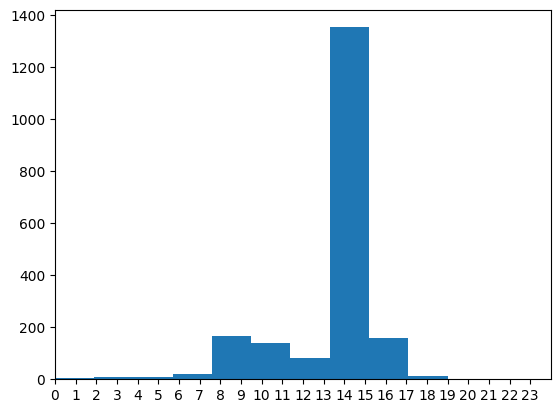

In [26]:
from datetime import datetime
# plt.hist(x=df['Mon Start Time'])

def chart(occurance_list):
    datetime_list = [datetime.strptime(datetime_str, '%H:%M:%S') for datetime_str in occurance_list]
    hour_list = [t.hour for t in datetime_list]
#     print hour_list
    numbers=[x for x in range(0,24)]
    labels=map(lambda x: str(x), numbers)
    plt.xticks(numbers, labels)
    plt.xlim(0,24)
    plt.hist(hour_list)
    plt.show()
    
chart(df['Thurs Start Time'].dropna())

In [4]:
df['Program Price'].unique()

array(['Free', '$50 or Less', 'More Than $50', 'Unknown'], dtype=object)

In [12]:
mon_hours = df['Mon Start Time'].dropna().unique()
chart(mon_hours)

AttributeError: 'str' object has no attribute 'hour'

In [5]:
df['Category Name'].unique() 

array(['Academic Support', 'Work + Career ', 'Music & Art.',
       'Managing Money.', 'Helping Your Community.', 'Reading & Writing',
       'Sports + Wellness.', 'Computers.', 'Science ',
       'Building And Fixing Things', 'Computers', 'Performance.',
       'Helping Your Community', 'Science & Math', 'Food', 'Food.',
       'Building & Fixing Things', 'Reading & Writing.', 'Math',
       'Digital Media.', 'Nature.', 'Healthcare', 'Transportation',
       'Social Studies ', 'Teaching', 'Law', 'Customer/Human Service',
       nan], dtype=object)

In [6]:
price_df = df['Program Price'].count() 
price_df

84606

In [7]:
program_dist = 100*df.groupby(['Program Price']).size()/(len(df))
program_dist

Program Price
$50 or Less      38.212420
Free             43.636385
More Than $50    13.928090
Unknown           4.223105
dtype: float64

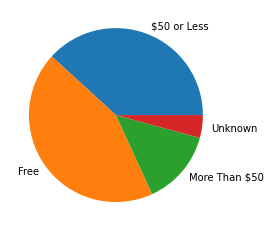

In [8]:
plt.pie(program_dist, labels = program_dist.keys())
plt.show()

In [9]:
category_dist = 100*df.groupby(['Category Name']).size()/(len(df))
category_dist

Category Name
Academic Support               3.174716
Building & Fixing Things       1.427795
Building And Fixing Things     0.002364
Computers                      0.007092
Computers.                     1.316691
Customer/Human Service         0.046096
Digital Media.                 0.282486
Food                           0.001182
Food.                          0.644162
Healthcare                     0.685531
Helping Your Community         0.001182
Helping Your Community.        0.793088
Law                            0.008274
Managing Money.                0.419592
Math                           0.047278
Music & Art.                  23.529064
Nature.                        2.113325
Performance.                   0.704442
Reading & Writing              0.001182
Reading & Writing.            10.398790
Science                        1.811928
Science & Math                 0.005910
Social Studies                 0.203295
Sports + Wellness.            51.806018
Teaching                  

In [71]:
category_dist

Category Name
Academic Support             3.174716
Building & Fixing Things     1.430159
Computers                    1.323783
Customer/Human Service       0.046096
Digital Media                0.282486
Food                         0.645344
Healthcare                   0.685531
Helping Your Community       0.794270
Law                          0.008274
Managing Money               0.419592
Music & Art                 23.529064
Nature                       2.113325
Performance.                 0.704442
Reading & Writing           10.399972
Science & Math               1.865116
Social Studies               0.203295
Sports & Wellness           51.806018
Teaching                     0.024821
Transportation               0.015365
Work + Career                0.525967
dtype: float64

In [74]:
df['Category Name'].replace({'Building And Fixing Things': "Building & Fixing Things",
                            'Computers.': 'Computers',
                            'Digital Media.': 'Digital Media',
                            'Food.': 'Food',
                            'Helping Your Community.': 'Helping Your Community',
                            'Music & Art.': 'Music & Art',
                            'Reading & Writing.': 'Reading & Writing',
                            'Sports + Wellness.': 'Sports & Wellness',
                            'Helping Your Community.': 'Helping Your Community',
                            'Music & Art.': 'Music & Art',
                            'Nature.': 'Nature',
                            'Managing Money.': 'Managing Money',
                            'Perfomance.': 'Performance',
                            'Science': 'Science & Math',
                            'Math': 'Science & Math',
                            'Science ': 'Science & Math'}, inplace=True)
df.head()

,IndexRow,Id,Logo Url,Program Name,Description,Org Name,Category Name,Capacity,Min Age,Max Age,...,Contact Email,Contact Phone,Program Price,Geographic Cluster Name,Program Pays Participants,Program Has Scholarships,Program Provides Transportation,Latitude,Longitude,Program Provides Free Food
0,"4,568",78752,NaN,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Academic Support,2000.0,7,15,...,recruitment@bbbschgo.org,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
1,"4,569",78752,NaN,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Work + Career,2000.0,7,15,...,recruitment@bbbschgo.org,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
2,"4,562",78749,https://cityoflearning-uploads.s3.amazonaws.co...,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Academic Support,100.0,12,18,...,wchatman@ymenchicago.com,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
3,"4,563",78749,https://cityoflearning-uploads.s3.amazonaws.co...,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Music & Art,100.0,12,18,...,wchatman@ymenchicago.com,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
4,"4,557",78746,https://cityoflearning-uploads.s3.amazonaws.co...,Refugee Youth Career Pathways,Refugee Youth Career Pathways (RYCP) provides ...,RefugeeOne,Managing Money,15.0,16,24,...,NaN,NaN,Free,NaN,Not Paid,YES,YES,NaN,NaN,False


In [11]:
category_dist = 100*df.groupby(['Category Name']).size()/(len(df))

category_dist_filt = category_dist.loc[lambda x : x > 2]
category_dist_filt

Category Name
Academic Support      3.174716
Music & Art          23.529064
Nature                2.113325
Reading & Writing    10.399972
Sports & Wellness    51.806018
dtype: float64

In [12]:
df['Category Name'].unique()

array(['Academic Support', 'Work + Career ', 'Music & Art',
       'Managing Money', 'Helping Your Community', 'Reading & Writing',
       'Sports & Wellness', 'Computers', 'Science & Math',
       'Building & Fixing Things', 'Performance.', 'Food',
       'Digital Media', 'Nature', 'Healthcare', 'Transportation',
       'Social Studies ', 'Teaching', 'Law', 'Customer/Human Service',
       nan], dtype=object)

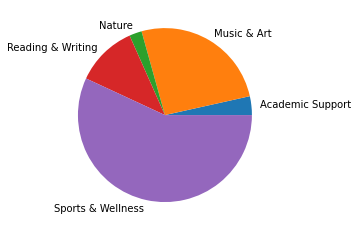

In [13]:
plt.pie(category_dist_filt, labels = category_dist_filt.keys())
plt.show()

In [14]:
df['Meeting Type'].unique()

array(['face_to_face', 'online'], dtype=object)

(array([16735., 46416.,  5061.,  5902.]),
 array([  0,  10,  30,  50, 100]),
 <a list of 4 Patch objects>)

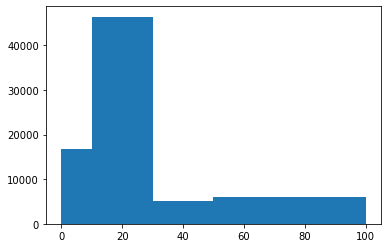

In [15]:
plt.hist(df['Capacity'], bins = [0, 10, 30, 50, 100, ])

In [16]:
pd.read_csv('data/CommAreas.csv')

,the_geom,PERIMETER,AREA,COMAREA_,COMAREA_ID,AREA_NUMBE,COMMUNITY,AREA_NUM_1,SHAPE_AREA,SHAPE_LEN
0,MULTIPOLYGON (((-87.60914087617894 41.84469250...,0,0,0,0,35,DOUGLAS,35,4.600462e+07,31027.054510
1,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,36,OAKLAND,36,1.691396e+07,19565.506153
2,MULTIPOLYGON (((-87.62879823733725 41.80189303...,0,0,0,0,37,FULLER PARK,37,1.991670e+07,25339.089750
3,MULTIPOLYGON (((-87.6067081256125 41.816813770...,0,0,0,0,38,GRAND BOULEVARD,38,4.849250e+07,28196.837157
4,MULTIPOLYGON (((-87.59215283879394 41.81692934...,0,0,0,0,39,KENWOOD,39,2.907174e+07,23325.167906
...,...,...,...,...,...,...,...,...,...,...
72,MULTIPOLYGON (((-87.69645961375822 41.70714491...,0,0,0,0,74,MOUNT GREENWOOD,74,7.558429e+07,48665.130539
73,MULTIPOLYGON (((-87.64215204651398 41.68508211...,0,0,0,0,75,MORGAN PARK,75,9.187734e+07,46396.419362
74,MULTIPOLYGON (((-87.83658087874365 41.98639611...,0,0,0,0,76,OHARE,76,3.718356e+08,173625.984660
75,MULTIPOLYGON (((-87.65455590025104 41.99816614...,0,0,0,0,77,EDGEWATER,77,4.844999e+07,31004.830946


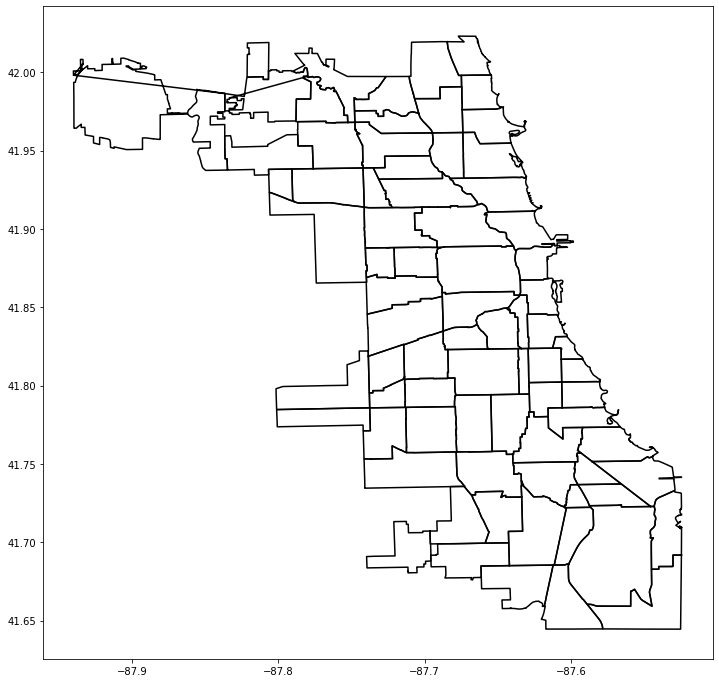

In [17]:


sf = shp.Reader("data/comm_areas.dbf")

plt.figure(figsize=(12, 12))
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y, color="black")
plt.show()

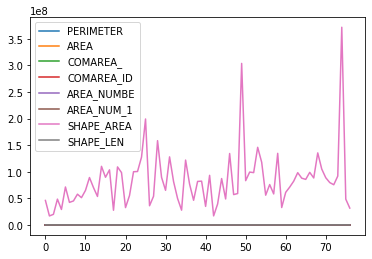

In [18]:
area_df = pd.read_csv('data/CommAreas.csv')
area_df.plot()

array([nan, '15:00:00', '16:00:00', '11:00:00', '9:00:00', '10:30:00',
       '13:30:00', '8:00:00', '7:30:00', '7:00:00', '6:00:00', '8:30:00',
       '8:45:00', '10:00:00', '9:30:00', '15:30:00', '13:00:00',
       '12:00:00', '7:45:00', '17:00:00', '14:00:00', '11:30:00',
       '12:01:00', '18:20:00', '12:25:00', '18:00:00', '19:00:00',
       '16:30:00', '14:30:00', '22:00:00', '8:15:00', '18:30:00',
       '15:59:00', '4:00:00', '3:00:00', '5:00:00', '0:00:00', '4:15:00',
       '17:30:00', '3:30:00', '4:30:00'], dtype=object)

In [76]:
import geopandas as gpd
map_df = gpd.read_file('data/comm_areas.shx')
print(map_df)

    area area_num_1 area_numbe  comarea  comarea_id        community  \
0    0.0         35         35      0.0         0.0          DOUGLAS   
1    0.0         36         36      0.0         0.0          OAKLAND   
2    0.0         37         37      0.0         0.0      FULLER PARK   
3    0.0         38         38      0.0         0.0  GRAND BOULEVARD   
4    0.0         39         39      0.0         0.0          KENWOOD   
..   ...        ...        ...      ...         ...              ...   
72   0.0         74         74      0.0         0.0  MOUNT GREENWOOD   
73   0.0         75         75      0.0         0.0      MORGAN PARK   
74   0.0         76         76      0.0         0.0            OHARE   
75   0.0         77         77      0.0         0.0        EDGEWATER   
76   0.0          9          9      0.0         0.0      EDISON PARK   

    perimeter    shape_area      shape_len  \
0         0.0  4.600462e+07   31027.054510   
1         0.0  1.691396e+07   19565.506153 

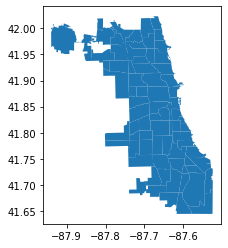

In [83]:
map_df.plot()

In [77]:
map_df.merge(df, left_on = 'community', right_on = 'Geographic Cluster Name').head()

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry,...,Contact Email,Contact Phone,Program Price,Geographic Cluster Name,Program Pays Participants,Program Has Scholarships,Program Provides Transportation,Latitude,Longitude,Program Provides Free Food
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.05451,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",...,NaN,NaN,More Than $50,DOUGLAS,Not Paid,NO,NO,41.826698,-87.620499,False
1,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.05451,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",...,NaN,NaN,More Than $50,DOUGLAS,Not Paid,NO,NO,41.826698,-87.620499,False
2,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.05451,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",...,NaN,NaN,More Than $50,DOUGLAS,Not Paid,NO,NO,41.826698,-87.620499,False
3,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.05451,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",...,NaN,NaN,More Than $50,DOUGLAS,Not Paid,NO,NO,41.826698,-87.620499,False
4,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.05451,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",...,NaN,NaN,More Than $50,DOUGLAS,Not Paid,NO,NO,41.830399,-87.610298,False


In [84]:
df.head(n)

,IndexRow,Id,Logo Url,Program Name,Description,Org Name,Category Name,Capacity,Min Age,Max Age,...,Contact Email,Contact Phone,Program Price,Geographic Cluster Name,Program Pays Participants,Program Has Scholarships,Program Provides Transportation,Latitude,Longitude,Program Provides Free Food
0,"4,568",78752,NaN,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Academic Support,2000.0,7,15,...,recruitment@bbbschgo.org,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
1,"4,569",78752,NaN,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Work + Career,2000.0,7,15,...,recruitment@bbbschgo.org,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
2,"4,562",78749,https://cityoflearning-uploads.s3.amazonaws.co...,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Academic Support,100.0,12,18,...,wchatman@ymenchicago.com,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
3,"4,563",78749,https://cityoflearning-uploads.s3.amazonaws.co...,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Music & Art,100.0,12,18,...,wchatman@ymenchicago.com,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
4,"4,557",78746,https://cityoflearning-uploads.s3.amazonaws.co...,Refugee Youth Career Pathways,Refugee Youth Career Pathways (RYCP) provides ...,RefugeeOne,Managing Money,15.0,16,24,...,NaN,NaN,Free,NaN,Not Paid,YES,YES,NaN,NaN,False


In [86]:
len(df)

84878

In [103]:
perc_free = (df.groupby(['Geographic Cluster Name', 'Program Price']).size()/df.groupby(['Geographic Cluster Name']).size()).loc[:, 'Free']
type(perc_free)

pandas.core.series.Series

In [35]:
perc_free

Geographic Cluster Name
ALBANY PARK       0.416856
ARCHER HEIGHTS    0.375451
ARMOUR SQUARE     0.334812
ASHBURN           0.333333
AUBURN GRESHAM    0.612591
                    ...   
WEST LAWN         0.434122
WEST PULLMAN      0.613879
WEST RIDGE        0.382530
WEST TOWN         0.283540
WOODLAWN          0.430255
Length: 79, dtype: float64

pandas.core.series.Series

In [107]:
df.groupby(['Geographic Cluster Name', 'Program Price']).size()[('ALBANY PARK', 'Free')]

183

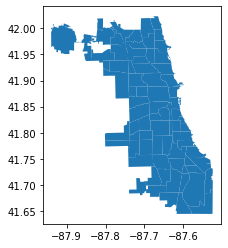

In [110]:
map_df.merge(perc_free.to_frame().reset_index(), left_on='community', right_on='Geographic Cluster Name').plot()

In [148]:
perc_df = perc_free.to_frame().reset_index()

In [123]:
map_df[map_df['community'] == 'NEW CITY']

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
58,0.0,61,61,0.0,0.0,NEW CITY,0.0,1.346370e+08,48133.595961,"POLYGON ((-87.63546 41.79448, -87.63599 41.794..."


In [150]:
filter_df = df.groupby(['Geographic Cluster Name']).size()

for entry in filter_df.index:
    print(entry)

ALBANY PARK
ARCHER HEIGHTS
ARMOUR SQUARE
ASHBURN
AUBURN GRESHAM
AUSTIN
AVALON PARK
AVONDALE
BELMONT CRAGIN
BEVERLY
BRIDGEPORT
BRIGHTON PARK
BURNSIDE
Bronzeville/South Lakefront
CALUMET HEIGHTS
CHATHAM
CHICAGO LAWN
CLEARING
DOUGLAS
DUNNING
EAST GARFIELD PARK
EAST SIDE
EDGEWATER
EDISON PARK
ENGLEWOOD
FOREST GLEN
FULLER PARK
GAGE PARK
GARFIELD PARK
GARFIELD RIDGE
GRAND BOULEVARD
GREATER GRAND CROSSING
HEGEWISCH
HERMOSA
HUMBOLDT PARK
HYDE PARK
IRVING PARK
JEFFERSON PARK
KENWOOD
LAKE VIEW
LINCOLN PARK
LINCOLN SQUARE
LOGAN SQUARE
LOOP
LOWER WEST SIDE
Little Village
MCKINLEY PARK
MONTCLARE
MORGAN PARK
MOUNT GREENWOOD
NEAR NORTH SIDE
NEAR SOUTH SIDE
NEAR WEST SIDE
NEW CITY
NORTH CENTER
NORTH LAWNDALE
NORTH PARK
NORWOOD PARK
OAKLAND
OHARE
PORTAGE PARK
PULLMAN
RIVERDALE
ROGERS PARK
ROSELAND
SOUTH CHICAGO
SOUTH DEERING
SOUTH SHORE
UPTOWN
WASHINGTON HEIGHTS
WASHINGTON PARK
WEST ELSDON
WEST ENGLEWOOD
WEST GARFIELD PARK
WEST LAWN
WEST PULLMAN
WEST RIDGE
WEST TOWN
WOODLAWN


In [99]:
df['Geographic Cluster Name'].replace({'Back of the Yards': 'NEW CITY',
                                      'Little Village': 'SOUTH LAWNDALE'}, inplace=True)
df.head()

,IndexRow,Id,Logo Url,Program Name,Description,Org Name,Category Name,Capacity,Min Age,Max Age,...,Contact Email,Contact Phone,Program Price,Geographic Cluster Name,Program Pays Participants,Program Has Scholarships,Program Provides Transportation,Latitude,Longitude,Program Provides Free Food
0,"4,568",78752,NaN,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Academic Support,2000.0,7,15,...,recruitment@bbbschgo.org,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
1,"4,569",78752,NaN,BBBS Community Based Mentoring (Year Round),Community Based Mentoring is the traditional B...,Big Brothers Big Sisters,Work + Career,2000.0,7,15,...,recruitment@bbbschgo.org,NaN,Free,NEAR WEST SIDE,Not Paid,YES,YES,41.886002,-87.642403,False
2,"4,562",78749,https://cityoflearning-uploads.s3.amazonaws.co...,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Academic Support,100.0,12,18,...,wchatman@ymenchicago.com,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
3,"4,563",78749,https://cityoflearning-uploads.s3.amazonaws.co...,Youth Mentoring and Academic Supports,Young Men's Educational Network provides mento...,Youth Mentoring and Academic Supports,Music & Art,100.0,12,18,...,wchatman@ymenchicago.com,NaN,Free,NORTH LAWNDALE,Not Paid,NO,NO,41.864799,-87.724800,True
4,"4,557",78746,https://cityoflearning-uploads.s3.amazonaws.co...,Refugee Youth Career Pathways,Refugee Youth Career Pathways (RYCP) provides ...,RefugeeOne,Managing Money,15.0,16,24,...,NaN,NaN,Free,NaN,Not Paid,YES,YES,NaN,NaN,False


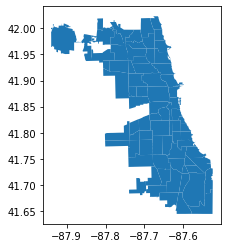

In [102]:
map_df.merge(perc_free.to_frame().reset_index(), left_on='community', right_on='Geographic Cluster Name').plot()

In [105]:
merge_df = map_df.merge(perc_free.to_frame().reset_index(), left_on='community', how = 'outer', right_on='Geographic Cluster Name')
merge_df.rename(columns = {0: "percentage_free_programs"}, inplace=True)
merge_df.head()

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry,Geographic Cluster Name,percentage_free_programs
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",DOUGLAS,0.586727
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816...",OAKLAND,0.227749
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801...",FULLER PARK,0.502825
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816...",GRAND BOULEVARD,0.608833
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816...",KENWOOD,0.625786


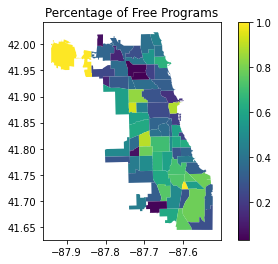

In [106]:
merge_df.plot(column="percentage_free_programs", legend=True, missing_kwds = dict(color = "gray"))
plt.title("Percentage of Free Programs")

plt.show()

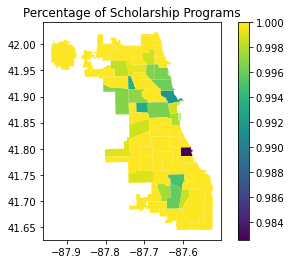

In [107]:
# Make this into a function because typing repeatedly is tedious, copy paste is a lot of repeated code

sch_df = (df.groupby(['Geographic Cluster Name', 'Program Has Scholarships']).size()/df.groupby(['Geographic Cluster Name']).size()).loc[:, 'NO']

merge_df = map_df.merge(sch_df.to_frame().reset_index(), left_on='community', right_on='Geographic Cluster Name')
merge_df.rename(columns = {0: "scholarship percentage"}, inplace=True)
merge_df.head()

merge_df.plot(column="scholarship percentage", legend=True)
plt.title("Percentage of Scholarship Programs")
plt.show()

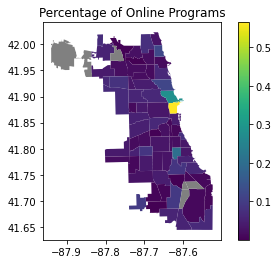

In [108]:

sch_df = (df.groupby(['Geographic Cluster Name', 'Meeting Type']).size()/df.groupby(['Geographic Cluster Name']).size()).loc[:, 'online']

merge_df = map_df.merge(sch_df.to_frame().reset_index(), how = 'outer', left_on='community', right_on='Geographic Cluster Name')
merge_df.rename(columns = {0: "scholarship percentage"}, inplace=True)
merge_df.head()

merge_df.plot(column="scholarship percentage", legend=True, missing_kwds = dict(color = "gray"))
plt.title("Percentage of Online Programs")
plt.show()

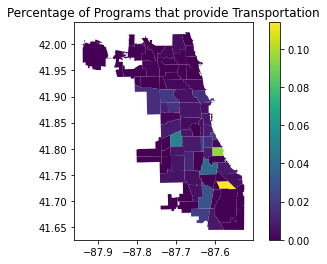

In [109]:
transport_df = (df.groupby(['Geographic Cluster Name', 'Program Provides Transportation']).size()/df.groupby(['Geographic Cluster Name']).size()).loc[:, 'NO']
transport_df = 1- transport_df 
transport_df
merge_df = map_df.merge(transport_df.to_frame().reset_index(), left_on='community', right_on='Geographic Cluster Name', how='outer')
merge_df.rename(columns = {0: "program provides transportation"}, inplace=True)
merge_df.head()

merge_df.plot(column="program provides transportation", missing_kwds = dict(color = "gray"), legend=True)
plt.title("Percentage of Programs that provide Transportation")
plt.show()

In [22]:
import numpy as np

sums = np.zeros(7)

for i, scheduled_day in enumerate(['Scheduled Mon', 'Scheduled Tues', 'Scheduled Wed', 'Scheduled Thurs','Scheduled Fri', 'Scheduled Sat', 'Scheduled Sun']):
    sums[i] = df[scheduled_day].sum()
    
print(sums)

[161. 209. 202. 189. 112. 121.  20.]


Text(0.5, 1.0, 'Distribution of Events by Day')

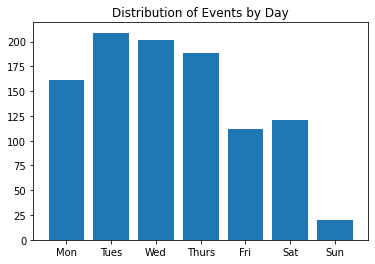

In [23]:
plt.bar(x = ['Mon', 'Tues', 'Wed', 'Thurs','Fri', 'Sat', 'Sun'], height = sums)
plt.title("Distribution of Events by Day")

TypeError: 'value' must be an instance of str or bytes, not a float

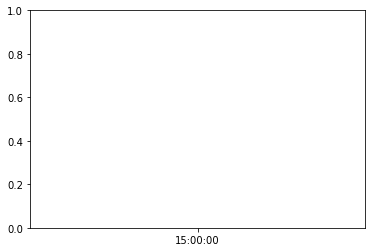

In [35]:
df.columns

Index(['IndexRow', 'Id', 'Logo Url', 'Program Name', 'Description', 'Org Name',
       'Category Name', 'Capacity', 'Min Age', 'Max Age', 'Meeting Type',
       'Address', 'City', 'State', 'Zipcode', 'Online Address', 'Program Url',
       'Registration Url', 'Registration Open', 'Registration Deadline',
       'Start Date', 'End Date', 'Start Time', 'End Time', 'Scheduled Mon',
       'Scheduled Tues', 'Scheduled Fri', 'Scheduled Sat', 'Scheduled Sun',
       'Scheduled Thurs', 'Scheduled Wed', 'Fri End Time', 'Fri Start Time',
       'Mon End Time', 'Mon Start Time', 'Sat End Time', 'Sat Start Time',
       'Sun End Time', 'Sun Start Time', 'Thurs End Time', 'Thurs Start Time',
       'Tues End Time', 'Tues Start Time', 'Wed End Time', 'Wed Start Time',
       'Contact Name', 'Contact Email', 'Contact Phone', 'Program Price',
       'Geographic Cluster Name', 'Program Pays Participants',
       'Program Has Scholarships', 'Program Provides Transportation',
       'Latitude', 'Longitu

In [36]:
df['Program Price']

0        Free
1        Free
2        Free
3        Free
4        Free
         ... 
84873    Free
84874    Free
84875    Free
84876    Free
84877    Free
Name: Program Price, Length: 84606, dtype: object

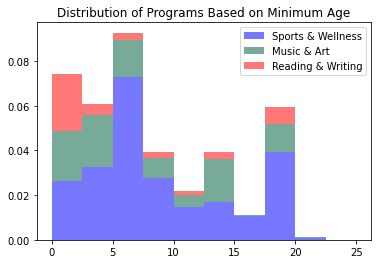

In [69]:
sports_df = df[df['Category Name'] == 'Sports & Wellness']['Min Age']
music_df = df[df['Category Name'] == 'Music & Art']['Min Age']
reading_df = df[df['Category Name'] == 'Reading & Writing']['Min Age']

colors = ['#7777FF', '#77AA99', '#FF7777']
labels = ['Sports & Wellness', 'Music & Art', 'Reading & Writing']

plt.hist([sports_df, music_df, reading_df], stacked=True, color=colors, label = labels, density = True)
plt.title("Distribution of Programs Based on Minimum Age")
plt.legend()

In [59]:
df['Category Name'].unique()

array(['Academic Support', 'Work + Career ', 'Music & Art.',
       'Managing Money.', 'Helping Your Community.', 'Reading & Writing',
       'Sports + Wellness.', 'Computers.', 'Science ',
       'Building And Fixing Things', 'Computers', 'Performance.',
       'Helping Your Community', 'Science & Math', 'Food', 'Food.',
       'Building & Fixing Things', 'Reading & Writing.', 'Math',
       'Digital Media.', 'Nature.', 'Healthcare', 'Transportation',
       'Social Studies ', 'Teaching', 'Law', 'Customer/Human Service',
       nan], dtype=object)